# Ensemble Methods
In this lecture we learnt three types of ensemble methods:
- Bagging or Bootstrap aggregation
- Random Forest
- Boosting

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Solving a classification problem using ensemble methods

### Read Data file for Highway Crash 

In [163]:
infile = "C:\Graduate Courses\Course_material_updates\Decision_Tree\Traffic_crash_data.csv"

In [164]:
df=pd.read_csv(infile)
df.head()

,cvs_x,cvs_x1,cvs_y,cvs_y1,crash,day,hour,date,oc_x,oc_x1,...,sd_sp_y1,sd_vl_x,sd_vl_x1,sd_vl_y,sd_vl_y1,vl_x,vl_x1,vl_y,vl_y1,Evc
0,0.070935,0.040367,0.056472,0.061572,1,1,16,8/1/2017 16:45,5.777778,5.755556,...,4.508872,3.541590,4.035556,4.641428,3.090693,159,150,174,143,0
1,0.049876,0.038167,0.056857,0.047196,0,1,16,8/8/2017 16:50,6.111111,8.022222,...,3.176509,3.817254,3.542934,3.598942,5.503246,165,173,185,165,0
2,0.051110,0.040697,0.047022,0.070983,0,1,16,8/1/2017 16:15,5.777778,6.333333,...,4.431617,3.468223,3.181793,4.287301,4.208834,138,137,155,150,0
3,0.055062,0.050744,0.068446,0.056914,0,1,16,8/1/2017 16:25,3.488889,4.488889,...,3.730124,2.956832,3.829708,3.925497,4.084815,87,100,112,114,0
4,0.061557,0.049912,0.069027,0.117209,0,1,16,8/29/2017 16:30,3.288889,4.422222,...,7.265629,2.548576,2.474633,1.914854,2.426049,86,98,100,102,0


## Data Preparation 

#### Defining target variable

In [165]:
y=np.array(df.crash)

#### Drop uneccesary columns

In [166]:
df.drop(['crash'],1,inplace=True)
df.drop(['date'],1,inplace=True)

#### Defining input features

In [167]:
X=df.values

In [168]:
X

array([[7.09350240e-02, 4.03671230e-02, 5.64724350e-02, ...,
        1.74000000e+02, 1.43000000e+02, 0.00000000e+00],
       [4.98764960e-02, 3.81670650e-02, 5.68569090e-02, ...,
        1.85000000e+02, 1.65000000e+02, 0.00000000e+00],
       [5.11102090e-02, 4.06971850e-02, 4.70223490e-02, ...,
        1.55000000e+02, 1.50000000e+02, 0.00000000e+00],
       ...,
       [3.30356580e-02, 9.23028000e-02, 4.25788360e-02, ...,
        3.32000000e+02, 3.64000000e+02, 1.00000000e+00],
       [4.58487860e-02, 1.90136578e-01, 2.91842150e-02, ...,
        2.08000000e+02, 2.07000000e+02, 1.00000000e+00],
       [8.40179760e-02, 1.79000522e-01, 1.09121049e-01, ...,
        8.30000000e+01, 7.70000000e+01, 1.00000000e+00]])

#### Splitting the dataset into train and test set

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X,y, random_state=66)

## Single Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=6608)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.738


## Bagging

In [171]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=6608)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=6608, verbose=0,
                  warm_start=False)

In [172]:
print("Accuracy on training set: {:.3f}".format(bagging.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bagging.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


In [173]:
from sklearn.neighbors import KNeighborsClassifier

knn_bagging = BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=6608)
knn_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=6608, verbose=0,
                  warm_start=False)

In [174]:
print("Accuracy on training set: {:.3f}".format(knn_bagging.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn_bagging.score(X_test, y_test)))

Accuracy on training set: 0.821
Accuracy on test set: 0.888


## Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=6608)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6608,
                       verbose=0, warm_start=False)

In [176]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.888


## Boosting

In [177]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=200, random_state=6608)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=6608)

In [178]:
print("Accuracy on training set: {:.3f}".format(abc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(abc.score(X_test, y_test)))

Accuracy on training set: 0.971
Accuracy on test set: 0.811


#### Plotting model accuracy for different number of estimators

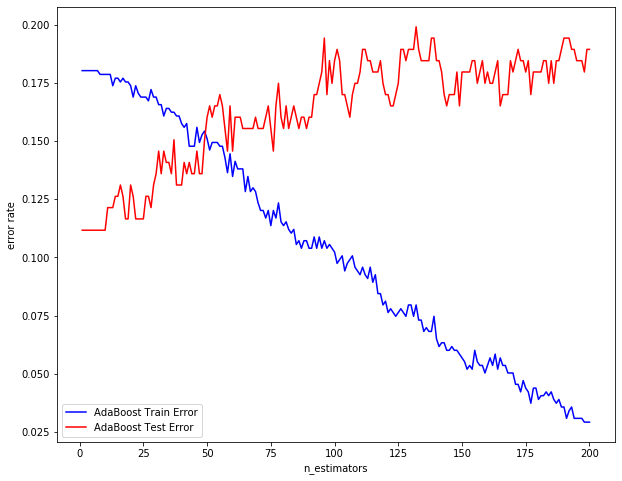

In [179]:
from sklearn.metrics import zero_one_loss
n_estimators = 200

fig,ax = plt.subplots(figsize=(10,8))

## iteratively calculating model error on train data

abc_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(abc.staged_predict(X_train)):
    abc_err_train[i] = zero_one_loss(y_pred, y_train)

## iteratively calculating model error on test data

abc_err_test = np.zeros((n_estimators,))
for i, y_pred in enumerate(abc.staged_predict(X_test)):
    abc_err_test[i] = zero_one_loss(y_pred, y_test)

## plots 

ax.plot(np.arange(n_estimators) + 1, abc_err_train,
        label='AdaBoost Train Error',
        color='blue')

ax.plot(np.arange(n_estimators) + 1, abc_err_test,
        label='AdaBoost Test Error',
        color='red')

#ax.set_ylim((0.0, 0.1))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='lower left', fancybox=True)